<br>

# Matplotlib 연습하기
[출처] : https://jehyunlee.github.io/2020/03/31/Python-DS-9-matplotlib_axis/

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [5]:
mpl.__version__

'3.1.1'

## matplotlib.pyplot
- MATLAB과 유사한 스타일

<function matplotlib.pyplot.show(*args, **kw)>

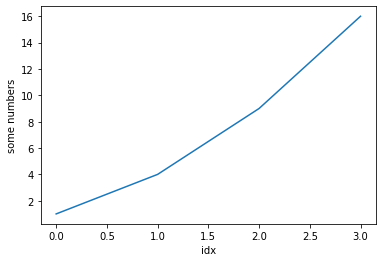

In [7]:
plt.plot([1,4,9,16])
plt.xlabel('idx')
plt.ylabel('some numbers')
plt.show

Text(0.5, 0.98, 'Categorical Plotting')

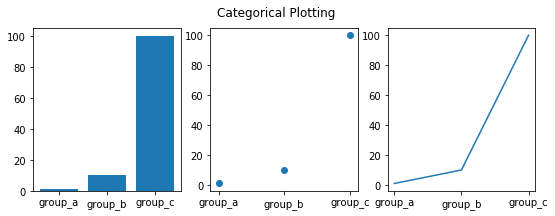

In [16]:
# subplot

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.bar(names, values)

plt.subplot(1,3,2)
plt.scatter(names, values)

plt.subplot(1,3,3)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')

<br>

## Object Oriented
- seaborn이 기본적인 설정을 잘 잡아주기 때문에 함께 이용
- fontdict를 사용해서 text가 들어가는 부분 처리
![img](https://jehyunlee.github.io/2020/03/31/Python-DS-9-matplotlib_axis/9_mpla_0.png)

### figure and axes
- Figure(캔버스 자체)와 Axes(그림 그릴 부분)를 동시 생성
- background color, grid color 등은 plt.style.use()를 사용하면 설정이 용이
- fontsize, linewidth 등은 seaborn의 seaborn.set_context()를 사용하면 좋다.
- 그림의 크기: plt.subplots() 안에 figsize=(가로, 세로)를 넣으면 된다.(단위는 inch)

TypeError: cannot unpack non-iterable AxesSubplot object

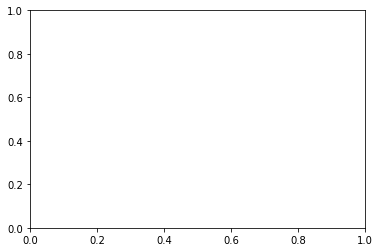

In [17]:
figure, axes = plt.subplot()

C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\bruce0809\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


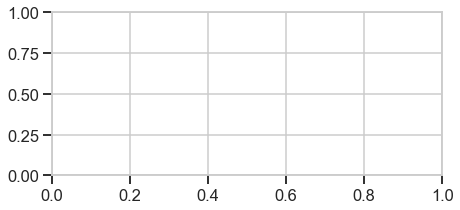

In [18]:
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(7,3))

### Data Preparation

In [19]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())

### Plot에 데이터 삽입

<BarContainer object of 10 artists>

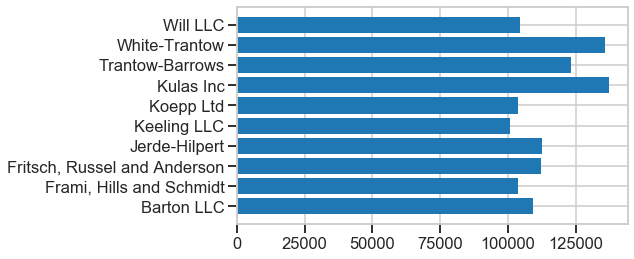

In [27]:
figure, axes = plt.subplots(figsize=(7,4))
axes.barh(group_names, group_data)

In [37]:
# 판다스랑 연계해보기
import pandas as pd

df = pd.DataFrame.from_dict(data, orient='index', columns=['revenue'])
df 

,revenue
Barton LLC,109438.50
"Frami, Hills and Schmidt",103569.59
"Fritsch, Russel and Anderson",112214.71
Jerde-Hilpert,112591.43
Keeling LLC,100934.30
Koepp Ltd,103660.54
Kulas Inc,137351.96
Trantow-Barrows,123381.38
White-Trantow,135841.99
Will LLC,104437.60


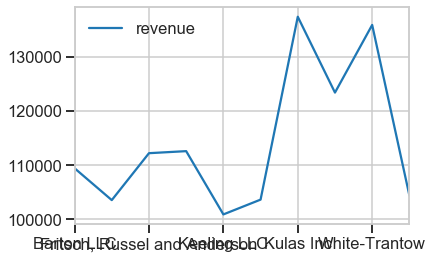

In [44]:
# 판다스에 직접 plot 수행
df.plot(kind='line')

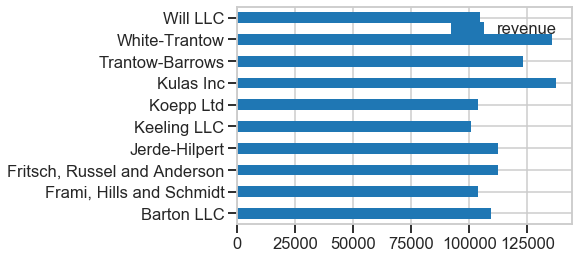

In [45]:
df.plot(kind='barh')

### Color Setting
- ax.barh() 안에 color='blue'처럼 색상을 지정하는 식으로 색상을 변경할 수도 있지만 번거롭다.
- 그릴 그림들의 색상을 일괄적으로 변경하려면, seaborn의 seaborn.set_palette가 편리하다.

<BarContainer object of 10 artists>

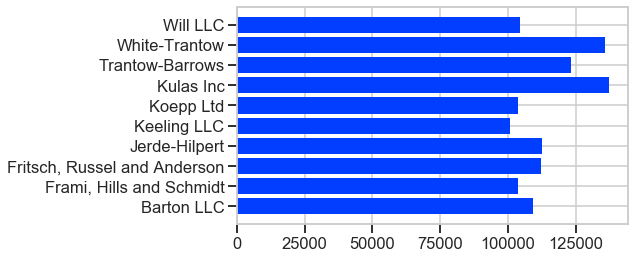

In [46]:
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(7,4))
ax.barh(group_names, group_data)

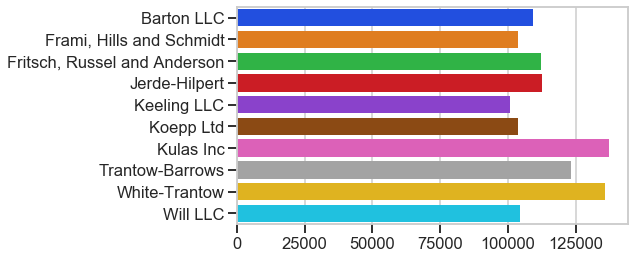

In [47]:
# mpl 말고 seaborn으로 그려보기(y축이 뒤집어 보인다.)
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

### Titles and Axes Labels
- x축 label : set_xlabel()
- y축 label : set_ylabel()
- title : set_title()

Text(0.5, 1.0, 'Company Revenue')

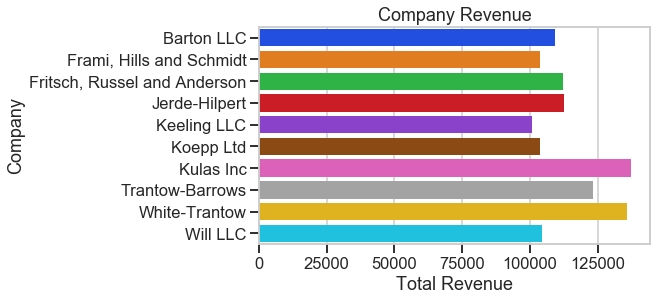

In [50]:
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue')
ax.set_ylabel('Company')
ax.set_title('Company Revenue')

<function matplotlib.pyplot.show(*args, **kw)>

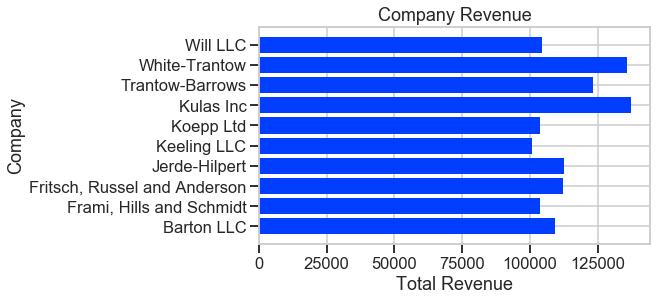

In [61]:
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(group_names, group_data)

plt.xlabel('Total Revenue')
plt.ylabel('Company')
plt.title('Company Revenue')
plt.show

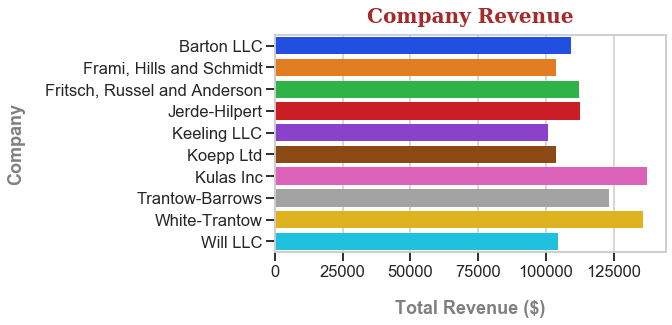

In [66]:
font_label = {
    'color': 'gray',
    'weight': 'bold'
}

font_title = {
    'family': 'serif',
    'size': 20,
#     'backgroundcolor': 'yellow',
    'color': 'brown',
    'weight': 'bold',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

ax.set_xlabel('Total Revenue ($)', fontdict=font_label, labelpad=20)
ax.set_ylabel('Company', fontdict=font_label, labelpad=20)
ax.set_title('Company Revenue', fontdict=font_title, pad=12)

plt.show()

### Axis Range and Tick Format

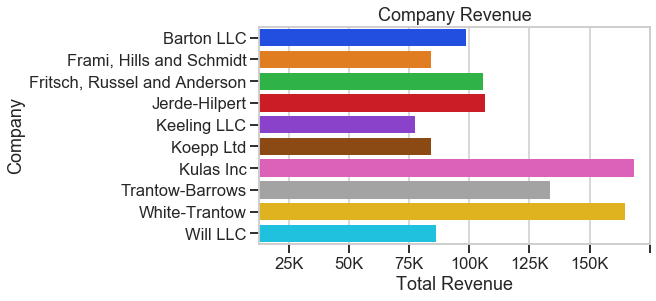

In [72]:
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

# xlabel에 k 입력
ax.set_xticklabels([f'{xlabel/1000:0.0f}K' for xlabel in xlabels])

ax.set_xlabel('Total Revenue')
ax.set_ylabel('Company')
ax.set_title('Company Revenue')

# x의 시작-끝 입력
ax.set_xlim(75000, 140000)

plt.show()

### Additional info
- 데이터 외에 추가적으로 읽기 좋은 정보를 입력할 때
- 평균 : ax.axvline()
- 선이 평균이라는 것을 알려주기 위한 화살표와 텍스트 : ax.annotate()
- 신규 정보 추가 : ax.text()

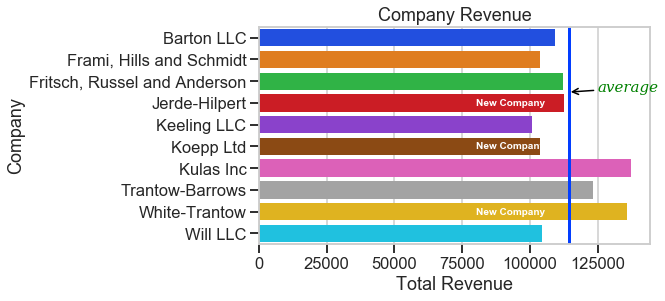

In [88]:
import numpy as np

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(group_data, group_names)

font_text = {
    'size':10,
    'color':'white',
    'weight':'bold',
    'horizontalalignment':'left',
    'verticalalignment':'center'
}

# 평균 선 긋기
mean = np.mean(group_data)
ax.axvline(mean, ls='-', lw=3)

# 평균
arrowprops = {
    'arrowstyle': '->'
}

ax.annotate("average", (mean, 2.5), xytext=(125000, 2.5),
          color='green', fontfamily='serif', fontstyle='italic', fontsize=15,
          arrowprops=arrowprops)

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(80000, group, "New Company", fontdict=font_text)

ax.set_xlabel('Total Revenue')
ax.set_ylabel('Company')
ax.set_title('Company Revenue')

plt.show()